In [1]:
import pandas as pd
import numpy as np

# Demand tab

## Electricity

In [2]:
d_e_nonscaled=pd.read_csv(r"EnergyPLAN files\Electricity\Hourly\el_demandBH_2020.txt",header=None,delimiter='\t',decimal=',')
d_eh_nonscaled=pd.read_csv(r"EnergyPLAN files\Heat\Hourly\demand_2020.txt",header=None,delimiter='\t',decimal=',')
d_ec_nonscaled=pd.read_csv(r"EnergyPLAN files\Heat\Hourly\CDD_BH_2020.txt",header=None,delimiter='\t',decimal=',')
d_transport_nonscaled=pd.read_csv(r"EnergyPLAN files\Transport\Hour_transport.txt",header=None,delimiter='\t',decimal=',')

In [3]:
d_e=d_e_nonscaled/d_e_nonscaled.sum(axis=0)
d_eh=d_eh_nonscaled/d_eh_nonscaled.sum(axis=0)
d_ec=d_ec_nonscaled/d_ec_nonscaled.sum(axis=0)
d_e_transport=d_transport_nonscaled/d_transport_nonscaled.sum(axis=0)

In [4]:
D_E=10.67#ann el demand TWh/ann
D_add=0.43
D_EH=2.9145+0.08/4.4 #HEAT PUMPS + EL HEATING
D_EC=0.2202
D_E_TRANSPORT=0.059

In [5]:
d_e_tot=D_E*d_e+D_add*d_e+D_E_TRANSPORT*d_e_transport-(D_EH*d_eh+D_EC*d_ec)
d_e_tot[d_e_tot[d_e_tot.columns[0]]<0]=0

In [6]:
d_e_tot.sum()

0    8.006118
dtype: float64

In [7]:
d_e_tot=d_e_tot.assign(Timestamp=pd.date_range("2020-01-01 00:00:00","2020-12-31 23:00:00", freq="1H"))
d_e_tot["Month"]=d_e_tot["Timestamp"].dt.month


In [8]:
(d_e_tot.groupby("Month")[0].mean())*1000000

Month
1      801.953595
2      829.401012
3      767.540468
4      812.632608
5      880.854279
6      991.665553
7     1011.064912
8      960.521048
9     1033.740844
10     991.081214
11     924.427906
12     930.907740
Name: 0, dtype: float64

## Heating and cooling

### Individual heating

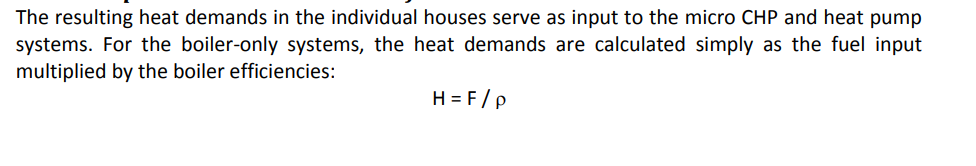

In [9]:
fuel_coal_domestic=1.15
fuel_oil_domestic=0.412#twh/ann
fuel_ngas_domestic=0.7125
fuel_biomass_domestic=13.47

rho_coal_dom=0.8
rho_oil_dom=0.85
rho_ngas_dom=0.9
rho_biomass_dom=0.9

H_coal_boiler=fuel_coal_domestic*rho_coal_dom*d_eh
H_oil_boiler=fuel_oil_domestic*rho_oil_dom*d_eh

H_ngas_boiler=fuel_ngas_domestic*rho_ngas_dom*d_eh
H_biomass_boiler=fuel_biomass_domestic*rho_biomass_dom*d_eh #0.9 is efficiency

In [10]:
print("Kotao na ugalj, domaćinstva",H_coal_boiler.sum(),"TWh/god")
print("Kotao na tečno gorivo, domaćinstva",H_oil_boiler.sum(),"TWh/god")
print("Kotao na prirodni gas, domaćinstva",H_ngas_boiler.sum(),"TWh/god")
print("Kotao na biomasu, domaćinstva",H_biomass_boiler.sum(),"TWh/god")

Kotao na ugalj, domaćinstva 0    0.92
dtype: float64 TWh/god
Kotao na tečno gorivo, domaćinstva 0    0.3502
dtype: float64 TWh/god
Kotao na prirodni gas, domaćinstva 0    0.64125
dtype: float64 TWh/god
Kotao na biomasu, domaćinstva 0    12.123
dtype: float64 TWh/god


### District heating

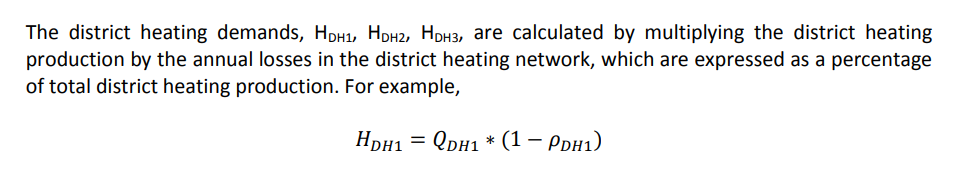
production_hourly=demand*ann production
demand=production*losses

In [11]:
Q_dh=1.12916666666667 #TWh/god
rho_dh=0.3
Q_chp=0.495833333333333 #TWh/god
rho_chp=0.3


In [12]:
q_dh_hourly=Q_dh*d_eh
q_chp_hourly=Q_chp*d_eh

In [13]:
h_dh=Q_dh*rho_dh*d_eh
h_chp=Q_chp*rho_chp*d_eh


In [14]:
h_dh,h_chp=h_dh.assign(Timestamp=pd.date_range("2020-01-01 00:00:00","2020-12-31 23:00:00", freq="1H")),h_chp.assign(Timestamp=pd.date_range("2020-01-01 00:00:00","2020-12-31 23:00:00", freq="1H"))
h_dh["Month"],h_chp["Month"]=h_dh["Timestamp"].dt.month,h_chp["Timestamp"].dt.month


q_dh_hourly,q_chp_hourly=q_dh_hourly.assign(Timestamp=pd.date_range("2020-01-01 00:00:00","2020-12-31 23:00:00", freq="1H")),q_chp_hourly.assign(Timestamp=pd.date_range("2020-01-01 00:00:00","2020-12-31 23:00:00", freq="1H"))
q_dh_hourly["Month"],q_chp_hourly["Month"]=q_dh_hourly["Timestamp"].dt.month,q_chp_hourly["Timestamp"].dt.month

In [15]:
(q_dh_hourly.groupby("Month")[0].mean())*1000000+(q_chp_hourly.groupby("Month")[0].mean())*1000000

Month
1     390.629616
2     306.640727
3     283.328209
4     190.173915
5     113.623502
6      70.461656
7      47.979097
8      40.552911
9      61.742908
10    146.804056
11    255.761816
12    314.874332
Name: 0, dtype: float64

In [16]:
(q_dh_hourly.groupby("Month")[0].mean())*1000000

Month
1     271.437503
2     213.075993
3     196.876781
4     132.146490
5      78.953767
6      48.961817
7      33.339321
8      28.179074
9      42.903405
10    102.009998
11    177.721672
12    218.797292
Name: 0, dtype: float64

In [17]:
(q_chp_hourly.groupby("Month")[0].mean())*1000000

Month
1     119.192114
2      93.564735
3      86.451428
4      58.027425
5      34.669735
6      21.499839
7      14.639776
8      12.373837
9      18.839503
10     44.794058
11     78.040144
12     96.077040
Name: 0, dtype: float64

Kapacitet CHP je 82 MW, tako da će se CHP proizvodnja koja je po distribuciji veća od 82 MW skalirati postaviti na 82 MW.

In [18]:
q_chp_hourly.loc[q_chp_hourly[0]>82/1000000,0]=82/1000000

In [19]:
e_th_chp=q_chp_hourly

In [20]:
(e_th_chp.groupby("Month")[0].mean())*1000000

Month
1     80.514868
2     75.427330
3     72.090675
4     53.297953
5     34.663807
6     21.499839
7     14.639776
8     12.373837
9     18.839503
10    44.551195
11    66.856220
12    76.190397
Name: 0, dtype: float64

In [21]:
e_th_chp.sum()#TWh

0            0.417311
Month    57216.000000
dtype: float64

In [22]:
h_chp.sum()

0            0.14875
Month    57216.00000
dtype: float64

## Industry and other fuel consumption

In [23]:
f_i_coal=2.46527777777778 #twh/ann
f_i_oil=1.31888888888889
f_i_n_gas=0.888611111111111
f_i_biomass=0.200277777777778
#various
f_v_coal=5.82888888888889 #twh/ann
f_v_oil=1.86583333333333
f_v_n_gas=1.07194444444444
f_v_biomass=0.390833333333333

n_gasloss=0.00722222222222222
n_gas_nonscaled=pd.read_csv(r"EnergyPLAN files\Gas\Hourly\GAS_BH_2021.txt",header=None,delimiter='\t',decimal=',')
d_n_gas_ind_var=n_gas_nonscaled/n_gas_nonscaled.sum(axis=0)
g_n_gas_ind_var=(f_i_n_gas+f_v_n_gas)*d_n_gas_ind_var
d_n_gas_ind_var=d_n_gas_ind_var.assign(Timestamp=pd.date_range("2020-01-01 00:00:00","2020-12-31 23:00:00", freq="1H"))
d_n_gas_ind_var["Month"]=d_n_gas_ind_var["Timestamp"].dt.month

## Transport

In [24]:
ft_jf=0.0438343333333333#twh/ann
ft_diesel=11.6462377777778
ft_petrol=1.7351625
ft_ngas=0.0124667589301038
ft_LPG=0.807653333333333
transpot_n_gas_nonscaled=pd.read_csv(r"EnergyPLAN files\Gas\Hourly\const.txt",header=None,delimiter='\t',decimal=',')
d_n_gas_transport=transpot_n_gas_nonscaled/transpot_n_gas_nonscaled.sum(axis=0)
d_n_gas_transport=(ft_ngas)*d_n_gas_transport
d_n_gas_transport=d_n_gas_transport.assign(Timestamp=pd.date_range("2020-01-01 00:00:00","2020-12-31 23:00:00", freq="1H"))
d_n_gas_transport["Month"]=d_n_gas_transport["Timestamp"].dt.month

In [25]:
km_kwh_diesel=1.5
km_kwh_petrol=1.5
km_kwh_ngas=1.5
km_kwh_lpg=1.5
km_kwh_el=5

In [26]:
print("Billions diesel",km_kwh_diesel*ft_diesel)
print("Billions petrol",km_kwh_petrol*ft_petrol)
print("Billions ngas",km_kwh_ngas*ft_ngas)
print("Billions lpg",km_kwh_lpg*ft_LPG)
print("Billions el",km_kwh_el*D_E_TRANSPORT)


Billions diesel 17.4693566666667
Billions petrol 2.60274375
Billions ngas 0.018700138395155698
Billions lpg 1.2114799999999994
Billions el 0.295


# Supply 

## Heat and electricity

In [27]:
C_pp1=1058 #MW
mi_pp1_eff=0.2923
C_chp_el=443
C_chp_th=82
mi_chp_eff=0.2116
rho_chp_eff=0.4725#thermal

## Central power production

In [28]:

C_pp2=832.11 #MW
mi_pp2_eff=0.232299201880824

C_hydro=1684.9 #MW CAPACITY
mi_hydro=0.81279792 #efficiency
W_hydro=5.26143078712603 #water supply
S_hydro=6705.472 #GWh/ann
d_hydro_nonscaled=pd.read_csv(r"EnergyPLAN files\Supply\Hydro\hydroBH_2020.txt",header=None,delimiter='\t',decimal=',')
d_hydro=d_hydro_nonscaled/d_hydro_nonscaled.sum(axis=0)
w_hydro=W_hydro*d_hydro #hourly dist in TW

### Hydropower production

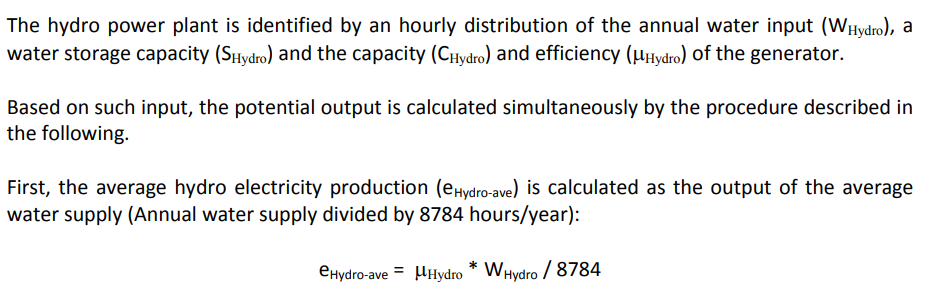

In [29]:
e_hydro_ave=(W_hydro*mi_hydro)/8784 #tw

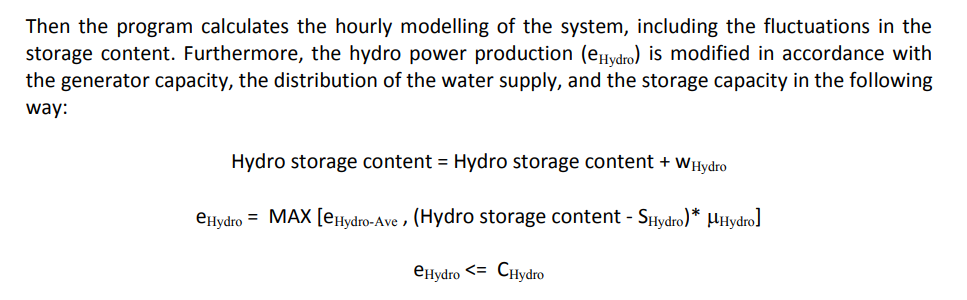

In [30]:
range1=np.arange(49,100,0.5)
percent_storage_cap_begin=0.5
percent_storage_cap_end=0.5
Hydro_storage_cont=(S_hydro*percent_storage_cap_begin+w_hydro*1000)#GW
k=0
while (k<len(range1)):
    if round(Hydro_storage_cont.values[0][0],0)==round(Hydro_storage_cont.values[8784][0],0):
        print(range1[k])
        Hydro_storage_cont=Hydro_storage_cont
        break
    else:
        Hydro_storage_cont=(S_hydro*range1[k]/100+w_hydro*1000)
    k=k+1

53.5


In [31]:
e_hydro_ave*1000000 #MW

486.84881602914385

In [32]:
e_hydro=np.zeros(len(Hydro_storage_cont))
for k in range(len(Hydro_storage_cont)):
    e_hydro[k]=max(e_hydro_ave*1000000,(Hydro_storage_cont.values[k]-S_hydro)*mi_hydro*1000)
    e_hydro[k]=min(e_hydro[k],C_hydro)

In [33]:
print("Potential annual production",e_hydro.sum()/1000000,"TWh")

Potential annual production 4.276966848816028 TWh


In [34]:
e_hydro=pd.DataFrame(e_hydro)
e_hydro=e_hydro.assign(Timestamp=pd.date_range("2020-01-01 00:00:00","2021-01-01 00:00:00", freq="1H"))
e_hydro["Month"]=e_hydro["Timestamp"].dt.month

In [35]:
(e_hydro.groupby("Month")[0].mean())

Month
1     486.848816
2     486.848816
3     486.848816
4     486.848816
5     486.848816
6     486.848816
7     486.848816
8     486.848816
9     486.848816
10    486.848816
11    486.848816
12    486.848816
Name: 0, dtype: float64

## RES

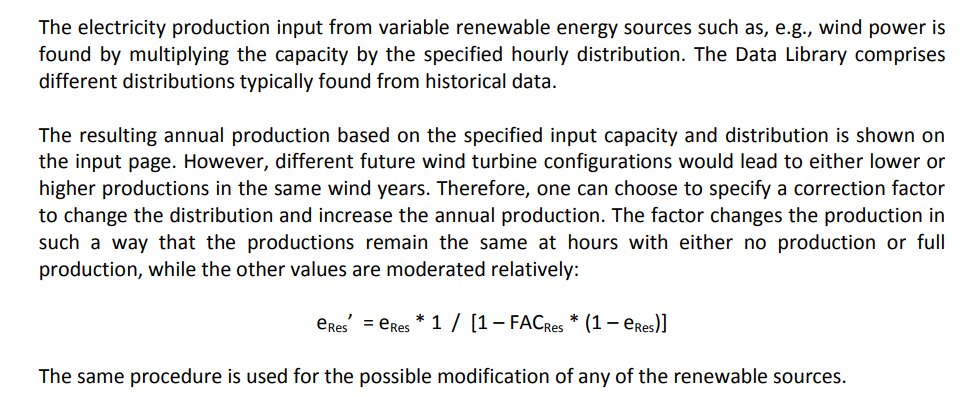

In [36]:
C_wind=86.6
C_PV=34.89
C_riv=172.19

d_wind_nonscaled=pd.read_csv(r"EnergyPLAN files\Supply\Wind\Wind_2020.txt",header=None,delimiter='\t',decimal=',')
d_solar_nonscaled=pd.read_csv(r"EnergyPLAN files\Supply\Solar\SolarBH_2020.txt",header=None,delimiter='\t',decimal=',')
d_river_nonscaled=pd.read_csv(r"EnergyPLAN files\Supply\Hydro\hydroBH_2020.txt",header=None,delimiter='\t',decimal=',')

In [37]:
d_wind=d_wind_nonscaled/d_wind_nonscaled.max(axis=0)
d_solar=d_solar_nonscaled/d_solar_nonscaled.max(axis=0)
d_river=d_river_nonscaled/d_river_nonscaled.max(axis=0)

FAC_wind=0
FAC_solar=0
FAC_river=0

In [38]:
e_wind_non_corr=C_wind*d_wind
e_solar_non_corr=C_PV*d_solar
e_river_non_corr=C_riv*d_river

In [39]:
e_wind_corr=e_wind_non_corr*1/(1-FAC_wind*(1-e_wind_non_corr))
e_solar_corr=e_solar_non_corr*1/(1-FAC_solar*(1-e_solar_non_corr))
e_river_corr=e_river_non_corr*1/(1-FAC_river*(1-e_river_non_corr))

In [40]:
e_wind_corr=e_wind_corr.assign(Timestamp=pd.date_range("2020-01-01 00:00:00","2020-12-31 23:00:00", freq="1H"))
e_wind_corr["Month"]=e_wind_corr["Timestamp"].dt.month

e_solar_corr=e_solar_corr.assign(Timestamp=pd.date_range("2020-01-01 00:00:00","2020-12-31 23:00:00", freq="1H"))
e_solar_corr["Month"]=e_solar_corr["Timestamp"].dt.month


e_river_corr=e_river_corr.assign(Timestamp=pd.date_range("2020-01-01 00:00:00","2021-01-01 00:00:00", freq="1H"))
e_river_corr["Month"]=e_river_corr["Timestamp"].dt.month

In [41]:
(e_river_corr.groupby("Month")[0].mean())#MW

Month
1     74.701595
2     54.264195
3     70.842619
4     30.680114
5     20.121598
6     35.445266
7     38.257167
8     33.802933
9     41.806613
10    57.108320
11    60.935342
12    78.722081
Name: 0, dtype: float64

In [42]:
(e_solar_corr.groupby("Month")[0].mean())#MW

Month
1      6.801332
2      7.670904
3      8.410681
4     10.967249
5      9.669117
6     11.682848
7     13.319944
8     11.792627
9      9.984286
10     7.891040
11     6.846972
12     3.399933
Name: 0, dtype: float64

In [43]:
(e_wind_corr.groupby("Month")[0].mean())#MW

Month
1     18.498640
2     22.510627
3     28.827916
4     18.990012
5     20.670483
6     12.046398
7     10.325512
8     12.273973
9     15.411954
10    15.677118
11    17.346523
12    27.121586
Name: 0, dtype: float64

## Fuel distribution

In [44]:
f_coal_dh=0.6525#twh/ann
f_oil_dh=0.0180555555555556
f_ngas_dh=0.483611111111111
f_biomass_dh=0.374722222222222

f_coal_chp=0.9425
f_biomass_chp=0.0497222222222222

f_coal_pp1=16.6387820311111#twh/ann
f_coal_pp2=22.7637458811111
f_oil_pp2=0.14
f_ngas_pp2=0.0672222
f_biomass_pp2=0.0186111

In [45]:
co2_coal=115 #kg/GJ
co2_fuel_oil_diesel=72.6
co2_ngas=63
co2_LPG=72
co2_waste=0#quest

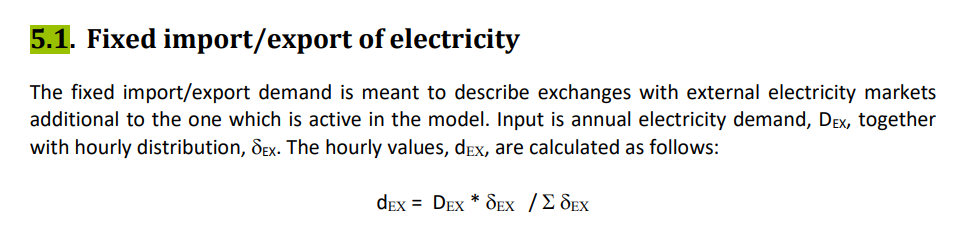

In [46]:
d_ex=0
d_pump=0
d_hydropump=0 #modifv

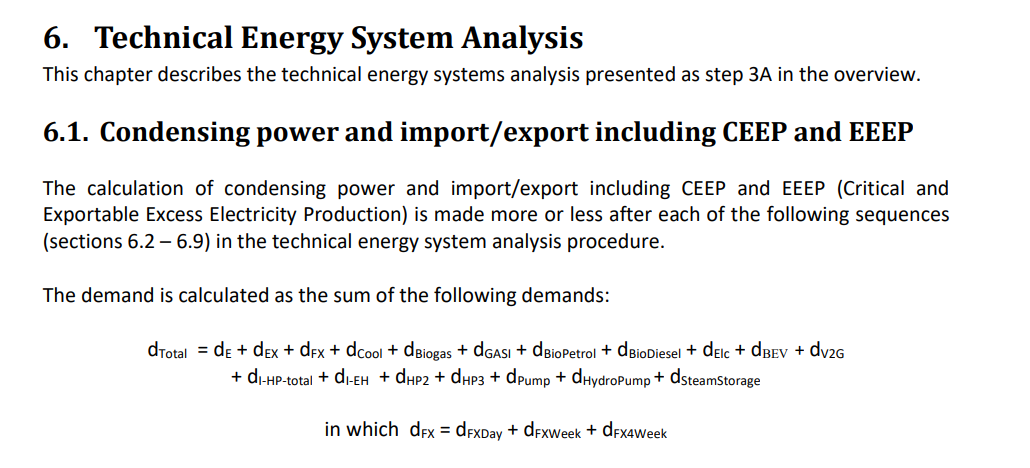

In [47]:
#D_add*d_e
d_tot_all=(d_e_tot[0]+d_ex+D_E_TRANSPORT*d_e_transport+(D_EH*d_eh+D_EC*d_ec)+d_pump+d_hydropump)*1000000

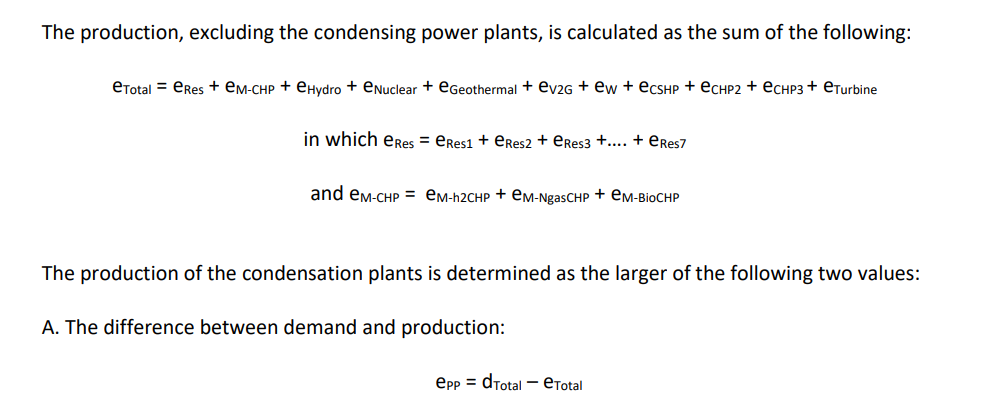

In [48]:
d_ehx=d_eh_nonscaled[0]/d_eh_nonscaled[0].max(axis=0)

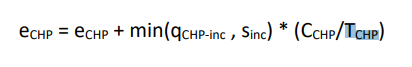

In [49]:
e_chp=(443)*d_ehx/0.4725

In [50]:
e_chp=pd.DataFrame(e_chp).assign(Timestamp=pd.date_range("2020-01-01 00:00:00","2020-12-31 23:00:00", freq="1H"))
e_chp["Month"]=e_chp["Timestamp"].dt.month

In [51]:
e_chp.groupby("Month")[0].mean()

Month
1     600.297465
2     471.228098
3     435.402741
4     292.248499
5     174.610161
6     108.281481
7      73.731558
8      62.319416
9      94.883003
10    225.600156
11    393.040270
12    483.881036
Name: 0, dtype: float64

Maksimalni kapacitet za električnu energiju je 443 MW, pa će se sve vrijednosti iznad postaviti na 443

In [52]:
e_chp.loc[e_chp[0]>443,0]=443

In [53]:
e_chp.sum()/1000000#TWh

0        2.170991
Month    0.057216
dtype: float64

In [54]:
e_chp.groupby("Month")[0].mean()

Month
1     430.257931
2     398.325848
3     378.447508
4     273.474735
5     174.610161
6     108.281481
7      73.731558
8      62.319416
9      94.883003
10    225.140756
11    348.041244
12    402.786134
Name: 0, dtype: float64

In [55]:
e_chp3=e_chp
e_turbine=0

In [56]:
e_tot=e_solar_corr[0]+e_wind_corr[0]+e_river_corr[0]+e_hydro[0]+e_chp3[0]+e_turbine

In [57]:
e_tot.sum()/1000000

7.124919804236341

In [58]:
d_tot_all[0].sum()/1000000

11.093290763300049

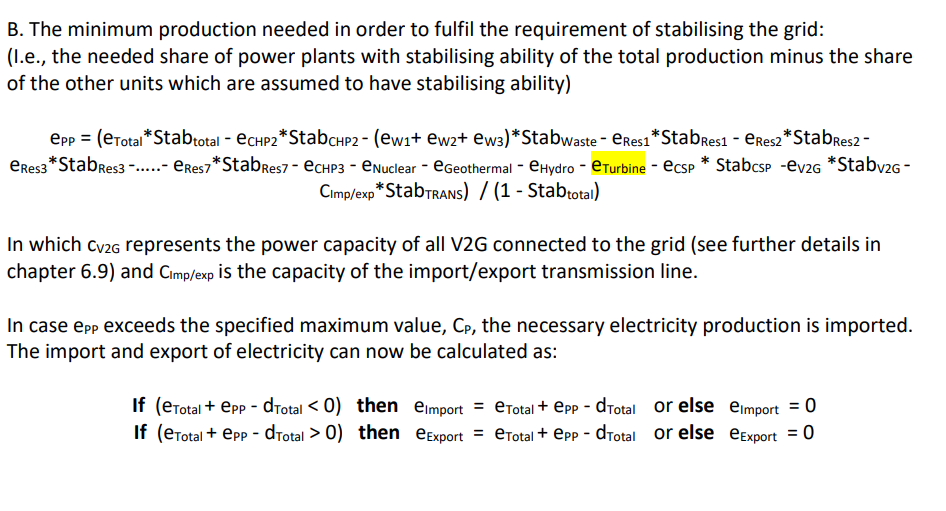

In [59]:
e_pp_1=pd.DataFrame(d_tot_all[0]-e_tot)

In [60]:
e_pp_1.loc[e_pp_1[0]<0,0]=0
e_pp_1.loc[e_pp_1[0]>1890.11,0]=0

In [61]:
e_pp_1=pd.DataFrame(e_pp_1).assign(Timestamp=pd.date_range("2020-01-01 00:00:00","2021-01-01 00:00:00", freq="1H"))
e_pp_1["Month"]=e_pp_1["Timestamp"].dt.month

In [62]:
e_pp_1.groupby("Month")[0].mean()

Month
1     591.883566
2     487.745261
3     441.915373
4     426.213892
5     397.102025
6     401.520485
7     484.473094
8     495.663570
9     397.571129
10    376.238000
11    445.524195
12    473.346512
Name: 0, dtype: float64

Apart from such minimum production, one can specify limitations on the operation in order to assure 
grid stability. A certain percentage (30 per cent is recommended) of the total electricity production 
must come from grid-stabilising units. CHP in group 3 and large power plants including hydro, 
geothermal and nuclear power are assumed to have such stabilising abilities. In addition, one can 
specify to which extent small CHPs in group 2 and RES units can provide grid stabilisation

In [63]:
e_pp_2=pd.DataFrame((0.98*e_tot-e_solar_corr[0]-e_wind_corr[0]-e_river_corr[0]-e_hydro[0]-e_chp3[0]-e_turbine-2100*0.3)/(1-0.98))

In [64]:
e_pp_2.loc[e_pp_2[0]<0,0]=0

In [65]:
e_pp_2.loc[e_pp_2[0]>0,0]

Series([], Name: 0, dtype: float64)

In [66]:
e_pp_1[0]=[max((e_pp_1.loc[i,0]),(e_pp_2.loc[i,0])) for i in range(len(e_pp_1[0]))]

In [67]:
e_pp_1.sum()/1000000

0        3.968371
Month    0.057217
dtype: float64

In [68]:
check1=e_tot+e_pp_1[0]-d_tot_all[0]

In [69]:
e_import=np.zeros(len(check1))
e_export=np.zeros(len(check1))
for i in range(len(check1)):
    if check1.loc[i]<0:
        e_import[i]=-check1[i]
    else:
        e_import[i]=0
    if check1.loc[i]>0:
        e_export[i]=check1[i]
    else:
        e_export[i]=0

In [70]:
e_export.sum()/1000000

6.821210263296962e-19

In [71]:
e_import.sum()/1000000

2.0463630789890886e-18

The export is divided into two categories: 1) Critical Excesss Electricity Production, e_CEEP and 2)Exportable Excess Electricity Production, e_EEEP. Critical excess electricity production appears when the export exceedes the maximum capacities of grid connections abroad:
<br>if e_export>C_Transmission, then e_CEEP= e_Export - C_transmission and e_EEEP = C_Transmission
<br>else:
<br>e_CEEP=0 and e_EEEP=e_Export

In [72]:
e_CEEP=np.zeros(len(e_export))
e_EEEP=np.zeros(len(e_export))
for i in range(len(e_export)):
    if e_export[i]>2100:
        e_CEEP[i]=e_export[i]-2100
        e_EEEP[i]=2100
    else:
        e_CEEP[i]=0
        e_EEEP[i]=e_export[i]
    

In [73]:
e_EEEP.sum()

6.821210263296962e-13

In [74]:
e_CEEP.sum()

0.0

# Costs

In [75]:


p_units=[None]*20
n_units=[None]*20
FOC_units=[None]*20
u_units=[None]*20

names=["Large_CHP","DHP boilers","PP","interconnection","Charge el2 storage","Discharge el2 storage","El2 storage capacity",
      "Wind","PV","River of hydro","Hydro power","Hydro storage","Indv. boilers","Indv. heat pumps","Indv. electric heat","Motorbikes",
      "Conv. cars","Diesel buses","Diesel trucks","Other vehicles"]

#large_CHP
p_units[0]=1.9#meur
n_units[0]=40#YEARS
FOC_units[0]=3.66#%
u_units[0]=443#MW
#dh
p_units[1]=1.02#meur
n_units[1]=22#YEARS
FOC_units[1]=0#%
u_units[1]=509#MW
#PP
p_units[2]=2#meur
n_units[2]=40#YEARS
FOC_units[2]=3.16#%
u_units[2]=1447#MW
#interconnection
p_units[3]=1.2#meur
n_units[3]=40#YEARS
FOC_units[3]=1#%
u_units[3]=2100#MW

#charge storage
p_units[4]=0.6#meur
n_units[4]=50#YEARS
FOC_units[4]=1.5#%
u_units[4]=420#MW

#discharge storage
p_units[5]=0.6#meur
n_units[5]=50#YEARS
FOC_units[5]=1.5#%
u_units[5]=420#MW

#storage-chargedischarge 
p_units[6]=7.5#meur
n_units[6]=50#YEARS
FOC_units[6]=1.5#%
u_units[6]=3#GWH

#wind
p_units[7]=1.483563#meur
n_units[7]=27#YEARS
FOC_units[7]=3.2#%
u_units[7]=87#MW
#solar
p_units[8]=0.726248#meur
n_units[8]=35#YEARS
FOC_units[8]=1.2#%
u_units[8]=35#MW

#river
p_units[9]=3.105115#meur
n_units[9]=60#YEARS
FOC_units[9]=1.5#%
u_units[9]=172#MW

#hydro
p_units[10]=2.041267#meur
n_units[10]=60#YEARS
FOC_units[10]=1.25#%
u_units[10]=1685#MW
#hydro storage
p_units[11]=7.5#meur
n_units[11]=50#YEARS
FOC_units[11]=1.5#%
u_units[11]=6705#GWh
#indv boil
p_units[12]=6.8#meur
n_units[12]=20#YEARS
FOC_units[12]=2#%
u_units[12]=322#x1000

#heat pumps
p_units[13]=7#meur
n_units[13]=15#YEARS
FOC_units[13]=2.68#%
u_units[13]=21#x1000

#indiv el.heating
p_units[14]=3#meur
n_units[14]=30#YEARS
FOC_units[14]=0.8#%
u_units[14]=67#x1000

#motorbikes
p_units[15]=1#meur
n_units[15]=5#YEARS
FOC_units[15]=5#%
u_units[15]=16.693#x1000

#conven cars
p_units[16]=30#meur
n_units[16]=10#YEARS
FOC_units[16]=26.13#%
u_units[16]=4.505#x1000
#buses
p_units[17]=6#meur
n_units[17]=5#YEARS
FOC_units[17]=12.78#%
u_units[17]=95.3191#x1000
#trucks
p_units[18]=30#meur
n_units[18]=10#YEARS
FOC_units[18]=26.13#%
u_units[18]=92.461#x1000
#otherveh
p_units[19]=6#meur
n_units[19]=5#YEARS
FOC_units[19]=12.78#%
u_units[19]=41.861#x1000

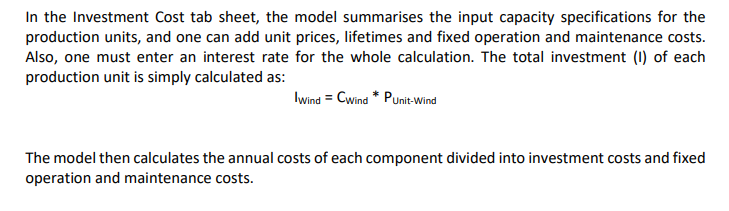

In [76]:
i=0.03# 3% #calc interest common for all
I=[None]*len(p_units)
A=[None]*len(p_units)
A_FOC=[None]*len(p_units)
for k in range(len(p_units)):
    I[k]=u_units[k]*p_units[k]
    A[k]=I[k]*i/(1-(1+i)**(-n_units[k]))
    A_FOC[k]=FOC_units[k]*I[k]/100
    print("Total investment:",names[k],":",round(I[k]),"MEUR\t","Annual investment",round(A[k]),"MEUR\t","Ann. fixed operat costs",round(A_FOC[k]),"MEUR")

Total investment: Large_CHP : 842 MEUR	 Annual investment 36 MEUR	 Ann. fixed operat costs 31 MEUR
Total investment: DHP boilers : 519 MEUR	 Annual investment 33 MEUR	 Ann. fixed operat costs 0 MEUR
Total investment: PP : 2894 MEUR	 Annual investment 125 MEUR	 Ann. fixed operat costs 91 MEUR
Total investment: interconnection : 2520 MEUR	 Annual investment 109 MEUR	 Ann. fixed operat costs 25 MEUR
Total investment: Charge el2 storage : 252 MEUR	 Annual investment 10 MEUR	 Ann. fixed operat costs 4 MEUR
Total investment: Discharge el2 storage : 252 MEUR	 Annual investment 10 MEUR	 Ann. fixed operat costs 4 MEUR
Total investment: El2 storage capacity : 22 MEUR	 Annual investment 1 MEUR	 Ann. fixed operat costs 0 MEUR
Total investment: Wind : 129 MEUR	 Annual investment 7 MEUR	 Ann. fixed operat costs 4 MEUR
Total investment: PV : 25 MEUR	 Annual investment 1 MEUR	 Ann. fixed operat costs 0 MEUR
Total investment: River of hydro : 534 MEUR	 Annual investment 19 MEUR	 Ann. fixed operat costs

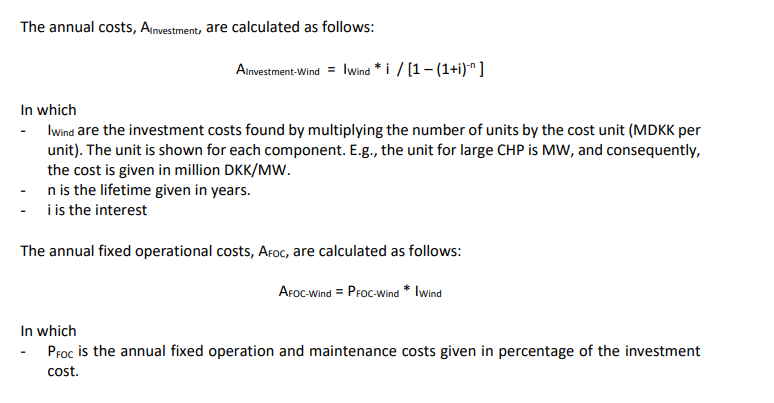

## Fuel prices

Fuel prices are specified as world market prices and domestic handling costs and taxes, if any. The 
input in the Fuel Cost tab sheet is used for two purposes. The one is a calculation of marginal 
productions costs, which is done in the Cost Operation tab sheet (see below in section 4.4). The other 
is a feasibility study including fuel costs, which is conducted at the end of the energy system analysis 
(see section 8.8)

In [77]:
#world market fuel prices
world_prices=[None]*7
world_prices[0]=2#coal
world_prices[1]=10.4#fuel oil
world_prices[2]=14.8#diesel
world_prices[3]=16.2#petrol
world_prices[4]=5.6#ngas
world_prices[5]=21.43#LPG
world_prices[6]=2.66#BIOMASS


PCoal_Hcen=0.502 #Fuel Handling costs for central power plants
PFuelOil_Hcen=0.3
PNgas_Hcen=4.8
PBiomass_Hcen =1.9 

PCoal_Hdec=3.57 
PFuelOil_Hdec=0.3
PNgas_Hdec=4.8
PBiomass_Hdec = 1.9#Fuel Handling costs for decentralised CHP and industry

PCoal_HIndv=1.60863612270943
PDiesel_HIndv=5.72 
PNgas_HIndv=2.6 
PBiomass_HIndv =7.26507769380895 #Fuel Handling costs for individual households

PDiesel_HRoad=5.78
PPetrol_HRoad=8.38
PJP_HAir=8.38
 #Fuel Handling costs for transport

PCoal_TaxB=0.21 #Taxes on Fuels for district heating boilers and chp



In [80]:
PVOC_Boiler_DH=8.35019040911389#EUR/MWH #Variable operational costs in district heating plants
PVOC_Hydro=9.51002899024966
PVOC_PP =9.71282780200733# Variable operational costs in power plants
PVOC_Hydropump=9.51002899024966

PVOC_Boiler_Indv=2.67235223238557 #eur/mwhth/
PVOC_HP_Indv=63.4002737816#eur/mwhe
PVOC_EH_Indv =63.4002737816 #Variable operational costs in individual households
#

## Marginal costs of producing 1 MWh of electricity

Gorivo + varijabilni trošak održavanja

The calculation of marginal production prices is based on the fuel specifications in the various input 
tab sheets. Only fuels which are specified as variable are included in the calculation

In [102]:
#CHP in condensation mode:
    #mi_pp1_eff=0.2923
    #f_coal_pp1=16.6387820311111#twh/ann
    #world_prices[0]=2#coal
    #PCoal_Hcen=0.502
    #PCoal_TaxB
    
marg_CHP=((world_prices[0]+PCoal_Hcen+PCoal_TaxB)*0.9499+(PBiomass_Hcen+world_prices[6])*0.05)*(3600/1000)/(mi_chp_eff)  #EUR/MWh el. produced  #EUR/MWh el. produced
print("Marginalni trosak, CHP",round(marg_CHP),"EUR/MWh")
    
marg_PP1=((world_prices[0]+PCoal_Hcen)*3600/1000)/mi_pp1_eff +PVOC_PP  #EUR/MWh el. produced
print("Marginalni trosak, PP1",round(marg_PP1),"EUR/MWh")

marg_PP2=((world_prices[0]+PCoal_Hcen)*0.99+(PFuelOil_Hcen+world_prices[1])*0.006+(PNgas_Hcen+world_prices[4])*0.0029+(PBiomass_Hcen+world_prices[6])*0.0008)*(3600/1000)/mi_pp2_eff +PVOC_PP
#EUR/MWh el. produced
print("Marginalni trosak, PP2",round(marg_PP2),"EUR/MWh")

marg_hydro=PVOC_Hydro  #EUR/MWh el. produced
print("Marginalni trosak, hidro",round(marg_hydro),"EUR/MWh")

Marginalni trosak, CHP 48 EUR/MWh
Marginalni trosak, PP1 41 EUR/MWh
Marginalni trosak, PP2 50 EUR/MWh
Marginalni trosak, hidro 10 EUR/MWh


## External electricity market

In [ ]:
#External Electricity Market Definition:
#pMarket-input = Hourly input, external market electricity price
#FacMul = Multiplication factor
#FacAdd = Addition factor
#FacDepend = Dependence factor (price elasticity)
#po = Basic price level for price elasticity
#PMax = Maximum Market Electricity Price 
#PMin = Minimum Market Electricity Price

In [104]:
pMarket_input=pd.read_csv(r"EnergyPLAN files\Electricity\Hourly\avex_market_price_2020.txt",header=None,delimiter='\t',decimal=',')
FacMul=1
FacAdd=0

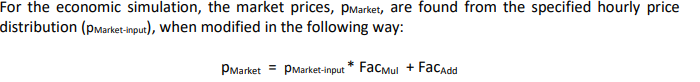

In [105]:
p_Market=pMarket_input*FacMul+FacAdd

In [106]:
p_Market.mean() #EUR/MWh

0    38.519376
dtype: float64

In [107]:
p_Market.min()

0   -9.71
dtype: float64

In [108]:
p_Market.max()

0    168.8
dtype: float64

In the economic simulation strategy and in the calculation of income from exchange, the market price 
is further influenced by the price elasticity, as described in sections 7.1, 7.10 and 8.9.2.
One can specify a maximum and minimum electricity market price. In the Nordpool market, the
minimum price is typically -500 EUR/MWh and the maximum is typically 3000 EUR/MWh.

# Emissions

In [ ]:
#For each component (here shown for small CHP):
#FSO2-CHP2 = Emission factor for SO2
#FPM25-CHP2 = Emission factor for PM2.5
#FNOx-CHP2 = Emission factor for NOx
#FCH4-CHP2 = Emission factor for CH4
#FN2O-CHP2 = Emission factor for N2O

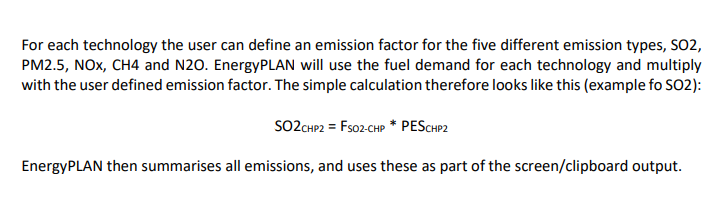

In [117]:
#depends on simulation
consumption_coal_domestic=1.15
consumption_oil_domestic=0.412#twh/ann
consumption_ngas_domestic=0.7125
consumption_biomass_domestic=13.47

In [118]:
consumption_i_coal=2.46527777777778 #twh/ann
consumption_i_oil=1.31888888888889
consumption_i_gas=0.888611111111111
consumption_i_biomass=0.200277777777778
#depends on simulation


#various
#various
consumption_v_coal=5.82888888888889 #twh/ann
consumption_v_oil=1.86583333333333
consumption_v_n_gas=1.07194444444444
consumption_v_biomass=0.390833333333333

consumption_jf=0.0438343333333333#twh/ann
consumption_diesel=11.6462377777778
consumption_petrol=1.7351625
consumption_ngas=0.0124667589301038
consumption_LPG=0.807653333333333

In [119]:
consumption_coal_dh=0.54#twh/ann
consumption_oil_dh=0.01
consumption_ngas_dh=0.40
consumption_biomass_dh=0.31

consumption_coal_chp=0.96
consumption_biomass_chp=0.06
consumption_ngas_chp=0.01
consumption_biomass_chp=0.01

consumption_coal_pp=36.74
consumption_oil_pp=1.70
consumption_ngas_pp=1.63
consumption_biomass_pp=1.58

co2_coal=115 #kg/GJ
co2_fuel_oil_diesel=72.6
co2_ngas=63
co2_LPG=72
co2_waste=0#quest


In [137]:
fuel_coal_non_corr=consumption_coal_domestic+consumption_i_coal+consumption_v_coal+consumption_coal_dh+consumption_coal_chp+consumption_coal_pp
print("Potrošnja uglja, nekorigovano",fuel_coal_non_corr,"TWh/god")
print("CO2 ugalj, nekorigovano",fuel_coal_non_corr*1000*3600*co2_coal/1000000000,"Mt")

fuel_oil_non_corr=consumption_oil_domestic+consumption_i_oil+consumption_v_oil+consumption_oil_dh+consumption_oil_pp+consumption_jf+consumption_diesel+consumption_petrol
print("Potrošnja naftnih derivata, nekorigovano",fuel_oil_non_corr,"TWh/god")
print("CO2 naftni derivati, nekorigovano",fuel_oil_non_corr*1000*3600*co2_fuel_oil_diesel/1000000000,"Mt")

fuel_ngas_non_corr=consumption_ngas_domestic+consumption_i_gas+consumption_v_n_gas+consumption_ngas_chp+consumption_ngas_dh+consumption_ngas_pp+consumption_ngas+consumption_LPG
print("Potrošnja prirodnog gasa, nekorigovano",fuel_ngas_non_corr,"TWh/god")
print("CO2 prirodni gas, nekorigovano",fuel_ngas_non_corr*1000*3600*co2_ngas/1000000000,"Mt")

fuel_ngas_non_corr=consumption_ngas_domestic+consumption_i_gas+consumption_v_n_gas+consumption_ngas_chp+consumption_ngas_dh+consumption_ngas_pp+consumption_ngas+consumption_LPG
print("Potrošnja prirodnog gasa, nekorigovano",fuel_ngas_non_corr,"TWh/god")
print("CO2 prirodni gas, nekorigovano",fuel_ngas_non_corr*1000*3600*co2_ngas/1000000000,"Mt")


Potrošnja uglja, nekorigovano 47.68416666666667 TWh/god
CO2 ugalj, nekorigovano 19.741245000000003 Mt
Potrošnja naftnih derivata, nekorigovano 18.731956833333356 TWh/god
CO2 naftni derivati, nekorigovano 4.895784237960005 Mt
Potrošnja prirodnog gasa, nekorigovano 5.533175647818987 TWh/god
CO2 prirodni gas, nekorigovano 1.2549242369253464 Mt
Potrošnja prirodnog gasa, nekorigovano 5.533175647818987 TWh/god
CO2 prirodni gas, nekorigovano 1.2549242369253464 Mt


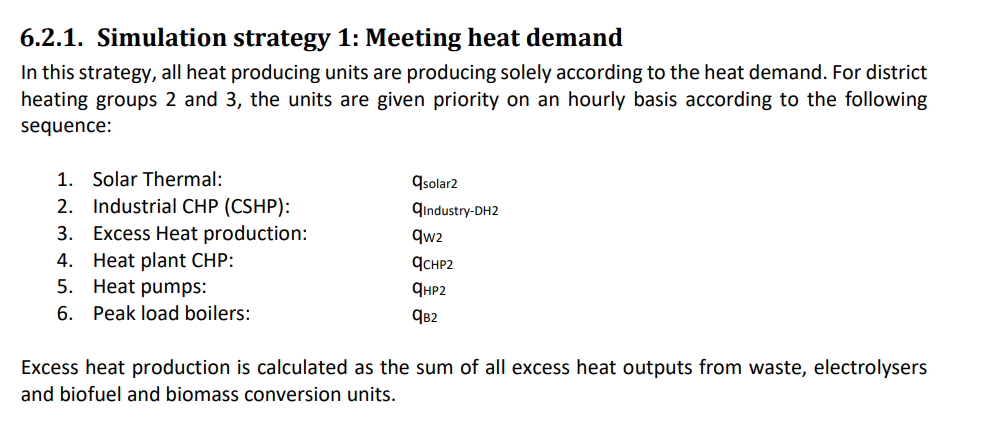

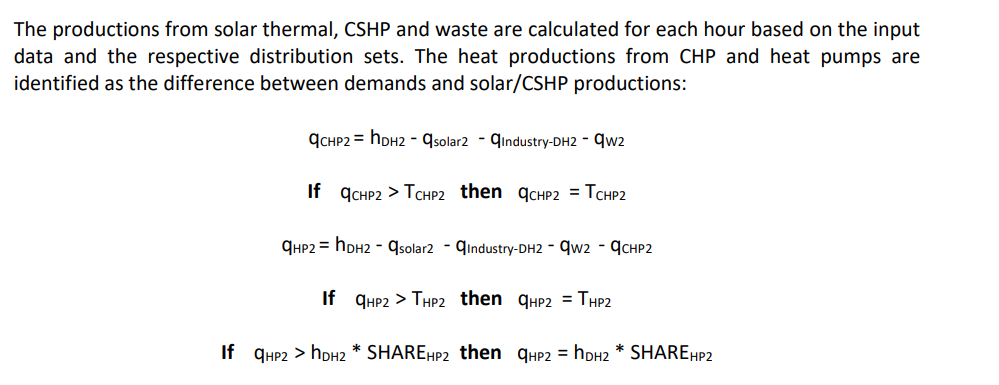

....

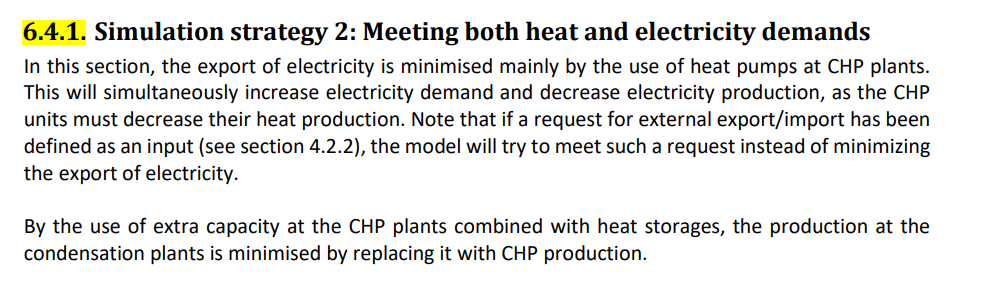

...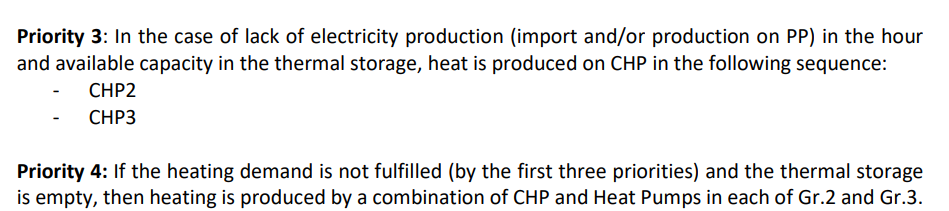

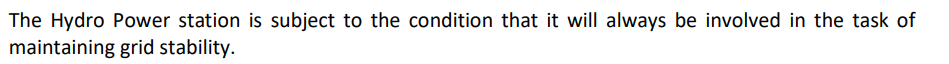

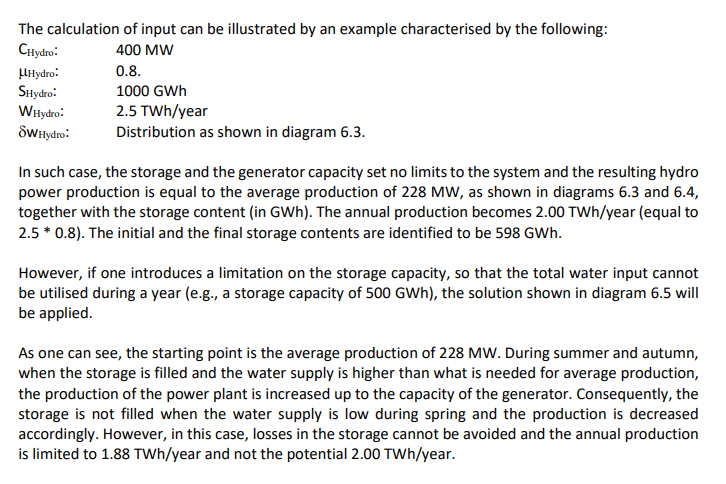

In the potential calculation of flexible demand, the baseline hydro power production is subtracted from 
the various demands (consumers, fixed import/export, heat pumps and transport) before the 
distribution of the flexible demand is determined, as described in section 6.3. In all technical simulation
strategies 1, 2, 3 and 4, the above baseline hydro power production is included when the power 
production from the remaining units is determined.
Subsequently, the condensing power and import/export are calculated again in accordance with 
section 6.1, and the hydro power is then used for replacing the condensing units and decreasing, first,
CEEP and, secondly, EEEP in the following way:
First, the potential of replacing the condensing power plant (eHydro-Inc) is determined as the minimum 
value of either the production of the condensing unit or the difference between hydro power capacity 
and hydro power production.

In [ ]:
e_pp_1

In [ ]:
e_hydro

In [ ]:
e_hydro_inc=[min(e_pp_1.loc[i,0],C_hydro-e_hydro.loc[i,0]) for i in range(len(e_pp_1))]

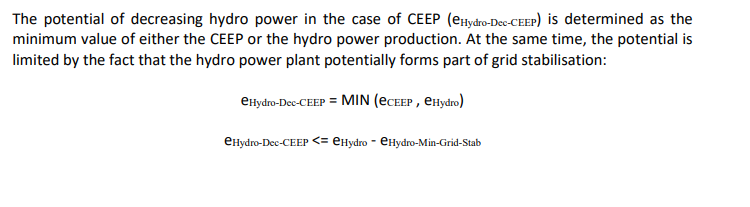

In [ ]:
e_CEEP

In [ ]:
e_hydro_dec=[min(e_CEEP[i],e_hydro.loc[i,0]) for i in range(len(e_hydro))]

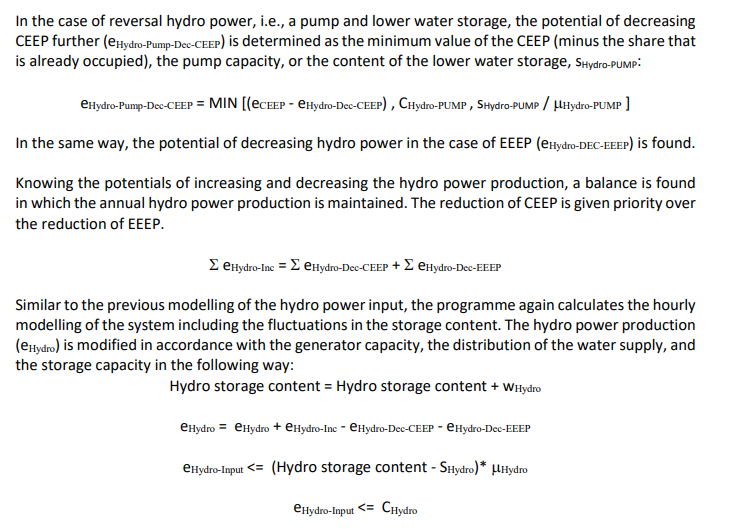

....

# Market-Economic Simulation

In [ ]:
d_net_import=e_tot+e_pp_1[0]-d_tot_all[0]

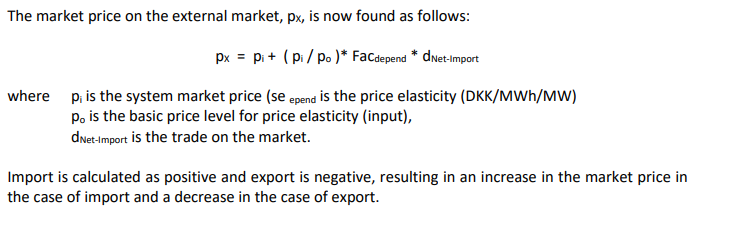

In [ ]:
px=pd.read_csv(r"EnergyPLAN files\Electricity\Hourly\avex_market_price_2020.txt",header=None,delimiter='\t',decimal=',')

Import is calculated as positive and export is negative, resulting in an increase in the market price in
the case of import and a decrease in the case of export

In [ ]:
### basic price fol el??

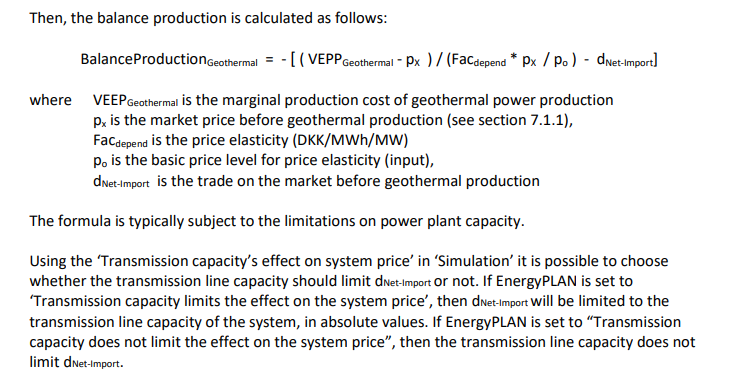

Step 2: Identifying marginal production (and consumption) costs